In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv('dropout.csv')

In [3]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [5]:
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

#### Realinho, V., Machado, J., Baptista, L., & Martins, M. V. (2022). Predicting Student Dropout and Academic Success. Data, 7(11), 146. 

detailed description of the dataset can be seen from the paper above

### data EDA

#### Target

In [9]:
unique = []
for i in df.columns:
    unique.append(df[i].nunique())

In [10]:
unique_counts = pd.DataFrame({'columns':df.columns, 'unique_value':unique}).sort_values('unique_value')

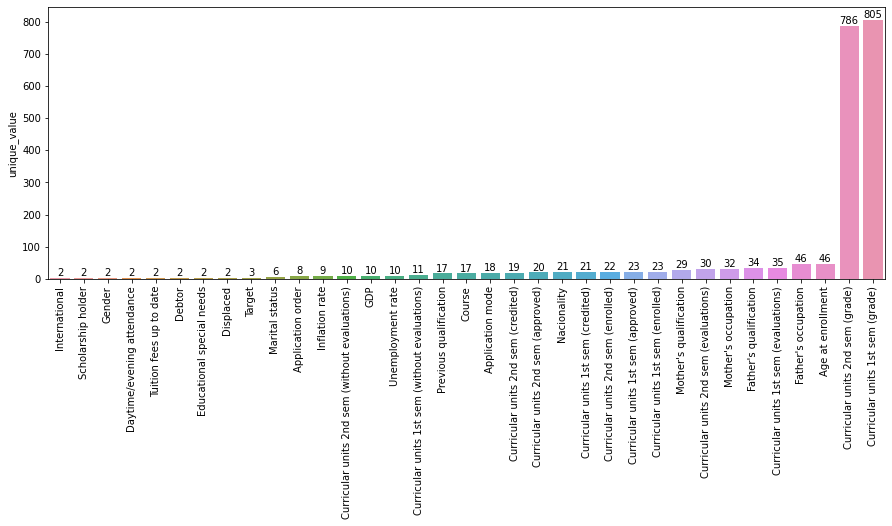

In [11]:
sns.barplot(data = unique_counts, x='columns', y='unique_value')
fig = plt.gcf()
fig.set_size_inches(15,5)
ax = plt.gca()
for i in ax.get_xticklabels():
    i.set_rotation(90)
ax.set_xlabel('')
for i in ax.containers:
    plt.bar_label(i)

In [28]:
unique_counts[unique_counts['unique_value']==2]['columns'].tolist()

['International',
 'Scholarship holder',
 'Gender',
 'Daytime/evening attendance',
 'Tuition fees up to date',
 'Debtor',
 'Educational special needs',
 'Displaced']

#### Marital status

1—Single,
2—Married,
3—Widower,
4—Divorced,
5—Facto union,
6—Legally separated 

In [234]:
label = {1:'Single', 2:'Married', 3:'Widower', 4:'Divorced', 5:'Facto union', 6:'Legally separated'}

In [252]:
marital_status = df['Marital status'].value_counts().reset_index()

In [255]:
marital_status['index'] = marital_status['index'].replace(label)

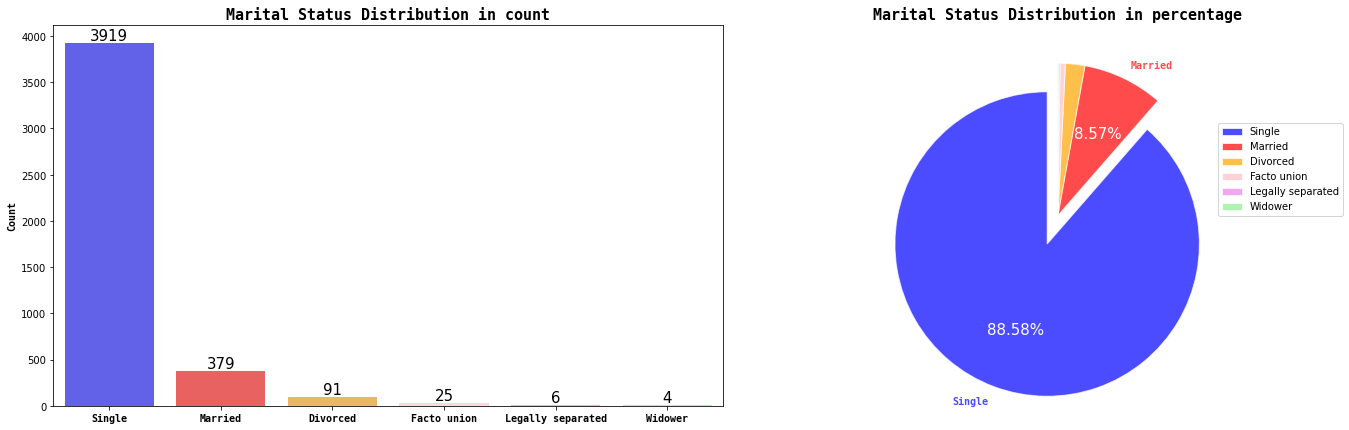

In [270]:
fig,axes = plt.subplots(1,2, figsize = (24,7),gridspec_kw=dict( wspace=0))
sns.barplot(data=marital_status, x='index', y='Marital status',palette=['blue', 'red', 'orange', 'pink', 'violet', 'lightgreen', 'grey'], alpha=0.7, ax=axes[0])
for i in axes[0].containers:
    axes[0].bar_label(i,size=15)
axes[0].set_ylabel('Count', font='monospace', weight='semibold')
axes[0].set_xlabel('')
axes[0].set_title('Marital Status Distribution in count', font='monospace', weight='semibold', size=15)
for i in axes[0].get_xticklabels():
    i.set_font('monospace')
    i.set_weight('semibold')
 
    
patches, texts, pcts = axes[1].pie(marital_status['Marital status'], labels=marital_status['index'],
           wedgeprops={'linewidth': 1, 'edgecolor': 'white'},textprops={'size': 'x-large'}, startangle=90, autopct='%1.2f%%',
           colors = ['blue', 'red', 'orange', 'pink', 'violet', 'lightgreen', 'grey'], explode=(0.2, 0, 0, 0,0,0));
for i in range(2,6):
    texts[i].set_visible(False)
    pcts[i].set_visible(False)
for i, patch in enumerate(patches):
    patch.set_alpha(0.7)
    texts[i].set_color(patch.get_facecolor())
axes[1].legend(loc=[0.92,0.5])
plt.setp(pcts, color='white', size=15)
plt.setp(texts, fontweight='semibold', font='monospace')
axes[1].set_title('Marital Status Distribution in percentage', font='monospace', weight='semibold', size=15);